<a href="https://colab.research.google.com/github/147203/AI-LAB-7/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving diamonds.csv to diamonds.csv
Loaded: diamonds.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


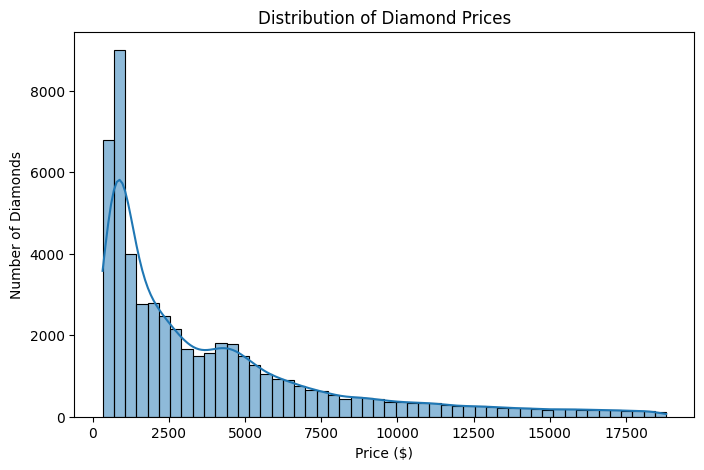

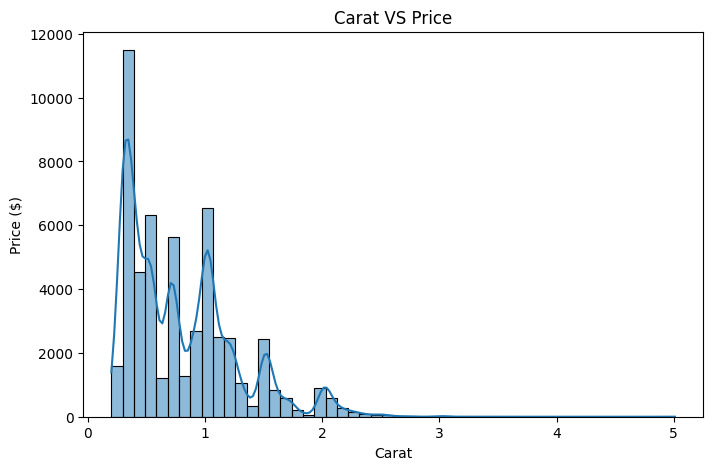

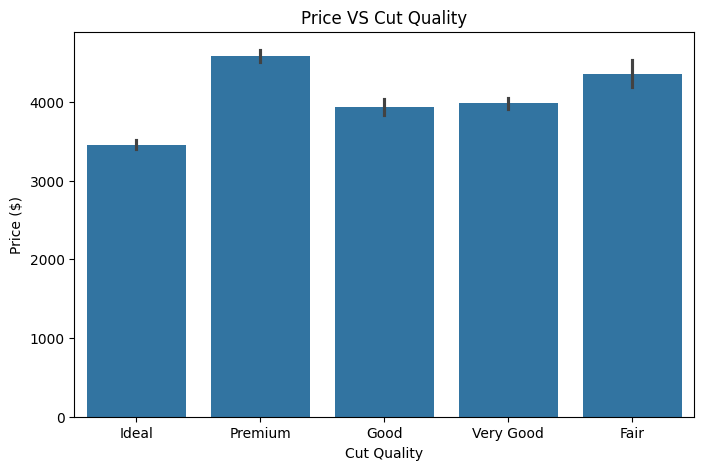

RANDOM DATA:  <bound method NDFrame.head of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
1388         1389   0.24      Ideal     G    VVS1   62.1   56.0    559  3.97   
50052       50053   0.58  Very Good     F    VVS2   60.0   57.0   2201  5.44   
41645       41646   0.40      Ideal     E    VVS2   62.1   55.0   1238  4.76   
42377       42378   0.43    Premium     E    VVS2   60.8   57.0   1304  4.92   
17244       17245   1.55      Ideal     E     SI2   62.3   55.0   6901  7.44   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
20190       20191   1.51  Very Good     G     SI2   62.8   56.0   8637  7.22   
369           370   1.00       Fair     G      I1   66.4   59.0   2808  6.16   
28714       28715   0.23    Premium     E    VVS1   61.3   60.0    680  4.01   
5030         5031   1.01    Premium     I     SI2   61.7   60.0   3749  6.34   
21286       21287   1.57  Very Good     I     VS2   60.2   58.0   9443  7.51

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))
df = pd.read_csv(filename)
print("Loaded:", filename)

#This piece of code provides the first five rows
df.head()

#These two lines of code will provide the general data of the dataset like data types and number of rows while the secomd line checks for any missing values
df.info()

df.isnull().sum()

#Distribution of Diamond prices
import matplotlib.pyplot as plt
import seaborn as sns

#This code draws a histogram showing how diamonds fall into each price range
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price ($)")
plt.ylabel("Number of Diamonds")
plt.show()

#This code draws a histogram compares diamond carats to prices
plt.figure(figsize=(8,5))
sns.histplot(df['carat'], bins=50, kde=True)
plt.title("Carat VS Price")
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.show()

#This is a bar graph that compares Cut Quality to Price
plt.figure(figsize=(8,5))
sns.barplot(x= 'cut', y= 'price', data=df)
plt.title("Price VS Cut Quality")
plt.xlabel("Cut Quality")
plt.ylabel("Price ($)")
plt.show()

diamonds_model=df.sample(n=12500, random_state=42)
print("RANDOM DATA: ",diamonds_model.head)


Question 3


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


X=df.drop(['price', 'Unnamed:0'], axis=1, errors='ignore').values
y=df['price'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


# Predict on the test data
y_pred = reg.predict(x_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# regression coefficients
#print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))


Mean Squared Error (MSE): 1751690.8069496313
Variance score: 0.8859696585090785
